Limpando a tabela para remover valores igual a zero

In [36]:
import pandas as pd

# Carregar o arquivo .xlsx
df = pd.read_excel(r'D:\tese\dados\Gráfico que não estão na tese\intelectuais 2.xlsx')

# Selecionar apenas as colunas a partir da segunda para verificar valores zero
df_filtered = df.loc[:, df.columns[1:]]  # Exclui a primeira coluna da verificação

# Remover as linhas onde todas as colunas a partir da segunda têm valor 0
df = df[df_filtered.ne(0).any(axis=1)]

# Exibir o DataFrame resultante
print(df)


                                            Unnamed: 0  \
0    Anaes I Congresso Internacional de História da...   
1    Anaes I Congresso Internacional de História da...   
2    Anaes I Congresso Internacional de História da...   
3    Anaes I Congresso Internacional de História da...   
4    Anaes I Congresso Internacional de História da...   
..                                                 ...   
161                    Revista Americana do Itamaraty    
162                    Revista Americana do Itamaraty    
164                    Revista Americana do Itamaraty    
165                    Revista Americana do Itamaraty    
168                    Revista Americana do Itamaraty    

     Vicente Huidobro (1893–1948)  José Vasconcelos (1882–1959)  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0  

Visualizando a base de dados e exportando

In [ ]:
from tabulate import tabulate

print(tabulate(df, headers='keys', tablefmt='grid'))

df.to_csv(r'D:\tese\dados\Gráfico que não estão na tese\intelectuais 2.csv', index=False)


+-----+--------------------------------------------------------+--------------------------------+--------------------------------+---------------------------------+----------------------------------+-------------------------------+--------------------------------------+--------------------------------+----------------------------+-----------------------------+----------------------------------+-------------------------------+-------------------------------------+---------------------------------+--------------------------------+-------------------------------+-----------------------------+---------------------------------+-----------------------------+------------------------------+--------------------------------------------+----------------------------------+----------------------------------+-------------------------------------------+-------------------------------+--------------------------------------------+----------------------------+-----------------------------+--------------

Gráfico

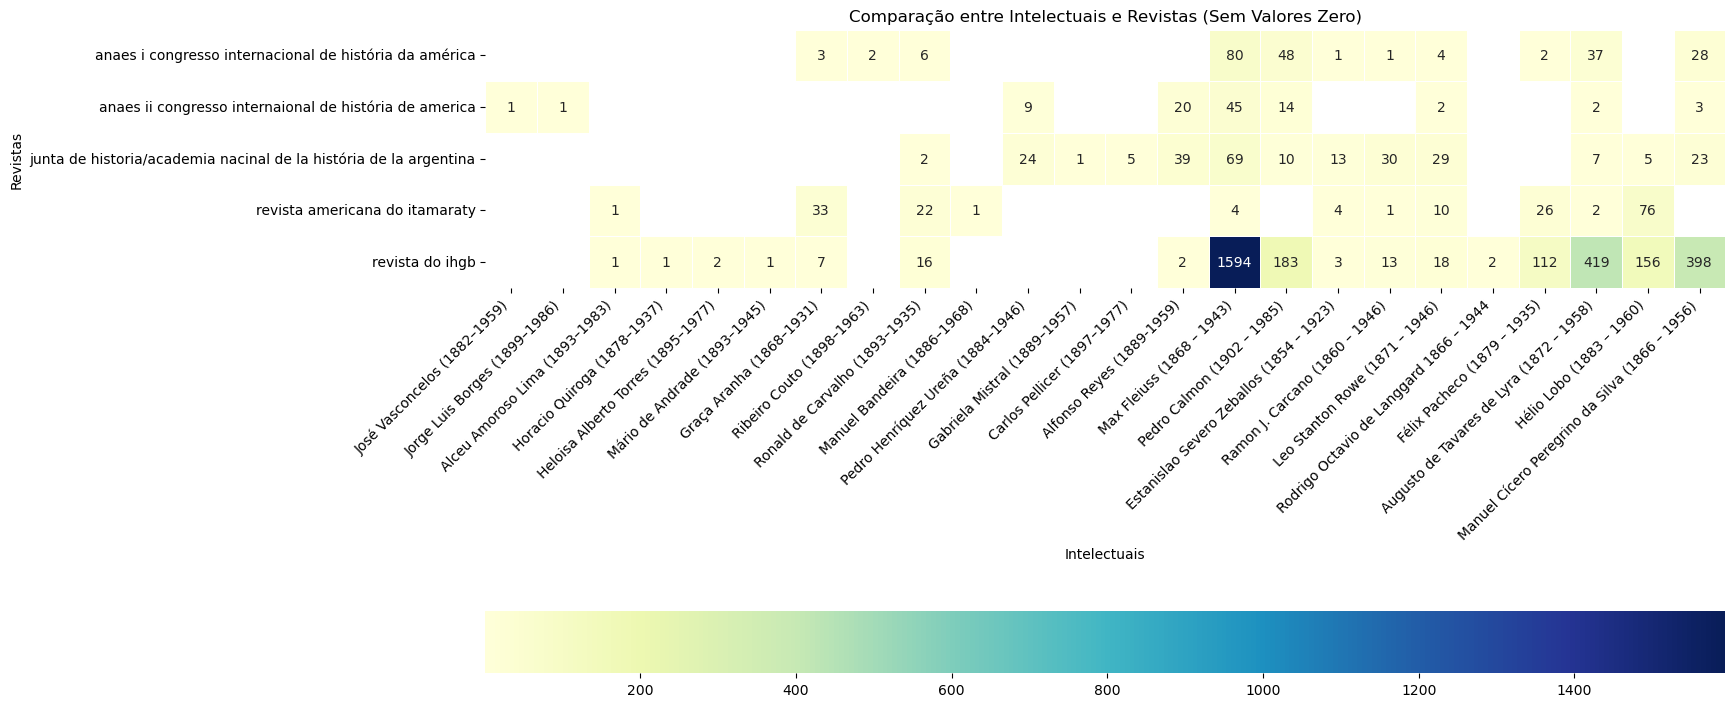

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados com a codificação UTF-8
file_path = r'D:\tese\dados\Gráfico que não estão na tese\intelectuais 2.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Definir a primeira coluna como índice, sem renomeá-la
data.set_index(data.columns[0], inplace=True)

# Padronizar os nomes das revistas e somar valores duplicados
data.index = data.index.str.strip().str.lower()
data_grouped = data.groupby(data.index).sum()

# Remover colunas (intelectuais) sem citações e substituir valores zero por NaN
data_non_zero = data_grouped.loc[:, (data_grouped != 0).any(axis=0)].replace(0, float('nan'))

# Corrigir o ano de "Manuel Cícero Peregrino da Silva"
data_non_zero.rename(columns={
    'Manuel Cícero Peregrino da Silva (1855 – 1923)': 'Manuel Cícero Peregrino da Silva (1866–1956)'
}, inplace=True)

# Plotar o gráfico de calor
plt.figure(figsize=(16, 14))
sns.heatmap(data_non_zero, annot=True, fmt=".0f", cmap='YlGnBu', cbar=True,
            cbar_kws={"orientation": "horizontal", "pad": 0.3}, linewidths=0.5, linecolor='white', square=True)
plt.title("Comparação entre Intelectuais e Revistas (Sem Valores Zero)")
plt.xlabel("Intelectuais")
plt.ylabel("Revistas")
plt.xticks(rotation=45, ha="right")
plt.gca().set_facecolor("white")  # Manter o fundo branco
plt.show()
